# Load Library

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from Class.logisticRegression import logisticRegression
import matplotlib.pyplot as plt

# Load data

In [2]:
bc = datasets.load_breast_cancer()

# Split data

In [3]:
x,y = bc.data, bc.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size=0.2)


# Train

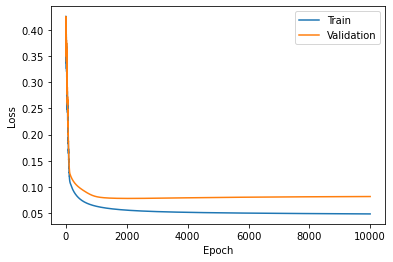

In [4]:
regressor = logisticRegression(learningRate=0.00001,n_iters=10000)
lossTrain,lossValidation = regressor.fit(x_train,y_train,x_validation,y_validation)
w = 5
lossTrain[0]=np.convolve(lossTrain[0], np.ones(w), 'valid')/w
lossValidation[0]=np.convolve(lossValidation[0], np.ones(w), 'valid')/w
plt.plot(lossTrain[0],label='Train')
plt.plot(lossValidation[0],label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Test accuracy

In [5]:
def accuracy (y_true,y_pred):
    accuracy = np.sum(y_true==y_pred)/len(y_true)
    return accuracy

In [6]:
predictions=regressor.predict(x_test)
print("LR classification accuracy:",accuracy(y_test,predictions))

LR classification accuracy: 0.8771929824561403


# Save model

In [7]:
regressor.saveWeights('Weights/testLinearRegresion')


# Crete new model and load weights

In [8]:
regressor2 = logisticRegression(learningRate=0.00001,n_iters=10000)
regressor2.loadWeights('Weights/testLinearRegresion')


# Predict with new model

In [9]:
predictions=regressor2.predict(x_test)
print("LR classification accuracy:",accuracy(y_test,predictions))

LR classification accuracy: 0.8771929824561403
